In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

In [1]:
input_folder=r"D:\dataset folder"
output=r"D:\OUTPUT"
splitfolders.ratio(input_folder,output,seed=42,ratio=(0.6,0.2,0.2))

NameError: name 'splitfolders' is not defined

In [ ]:
help(splitfolders.ratio)

In [2]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_height,img_width=(224,224)
batch_size=3
train_data_dir=r"D:\MTP PROJECT\OUTPUT\train"
valid_data_dir=r"D:\MTP PROJECT\OUTPUT\val"
test_data_dir=r"D:\MTP PROJECT\OUTPUT\test"

In [4]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.4)

train_generator=train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=batch_size,
      class_mode="categorical",
      subset="training")   #set as training data

train_generator=train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=batch_size,
      class_mode="categorical",
      subset="validation")   #set as validation data



Found 141 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


In [5]:
test_generator=train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=1,
      class_mode="categorical",
      subset="validation")   #set as validation data


Found 93 images belonging to 3 classes.


In [6]:
x,y=test_generator.next()
x.shape

(1, 224, 224, 3)

In [7]:
train_generator.num_classes

3

Epoch 1/10
31/31 [==============================] - 48s 828ms/step - loss: 1.3553 - accuracy: 0.7742
Epoch 2/10
31/31 [==============================] - 24s 775ms/step - loss: 0.2518 - accuracy: 0.9247
Epoch 3/10
31/31 [==============================] - 25s 796ms/step - loss: 0.1087 - accuracy: 0.9677
Epoch 4/10
31/31 [==============================] - 24s 779ms/step - loss: 0.0163 - accuracy: 0.9892
Epoch 5/10
31/31 [==============================] - 24s 764ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 25s 800ms/step - loss: 3.5794e-05 - accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 19s 580ms/step - loss: 3.6470e-04 - accuracy: 1.0000
Epoch 8/10
31/31 [==============================] - 13s 405ms/step - loss: 4.2789e-04 - accuracy: 1.0000
Epoch 9/10
31/31 [==============================] - 13s 406ms/step - loss: 4.0309e-05 - accuracy: 1.0000
Epoch 10/10
31/31 [==============================] - 13s 414ms/step - loss:

Text(0.5, 0, 'epochs')

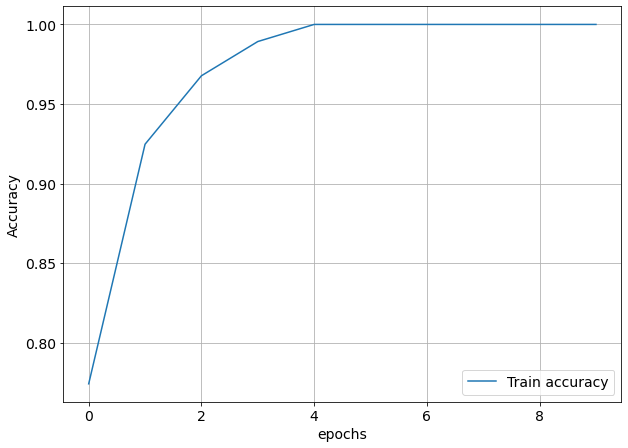

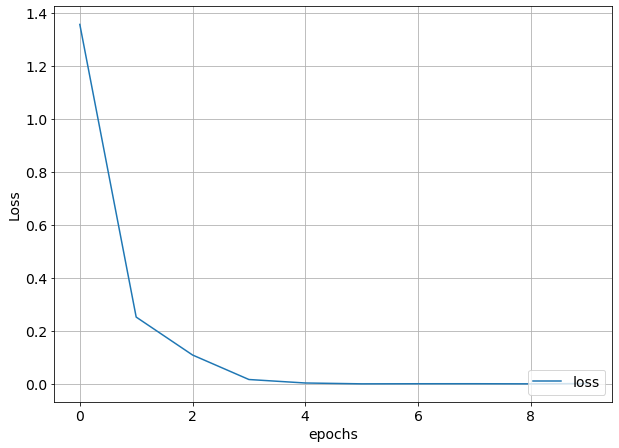

In [8]:
base_model=ResNet50(include_top=False, weights="imagenet")
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation="relu")(x)
predictions=Dense(train_generator.num_classes,activation="softmax")(x)
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False
    
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history=model.fit(train_generator,
         epochs=10)
accuracy = history.history['accuracy']
loss=history.history['loss']
# loss = history.history["categorical_crossentropy"]

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Train accuracy')
# plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('epochs')
# plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:
#           {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

Epoch 1/10
93/93 [==============================] - 40s 368ms/step - loss: 1.5237 - accuracy: 0.7527
Epoch 2/10
93/93 [==============================] - 34s 366ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3/10
93/93 [==============================] - 27s 292ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/10
93/93 [==============================] - 35s 375ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 5/10
93/93 [==============================] - 34s 366ms/step - loss: 6.9707e-05 - accuracy: 1.0000
Epoch 6/10
93/93 [==============================] - 34s 369ms/step - loss: 6.1774e-05 - accuracy: 1.0000
Epoch 7/10
93/93 [==============================] - 34s 365ms/step - loss: 4.9827e-05 - accuracy: 1.0000
Epoch 8/10
93/93 [==============================] - 36s 381ms/step - loss: 0.3807 - accuracy: 0.9355
Epoch 9/10
93/93 [==============================] - 33s 358ms/step - loss: 0.2217 - accuracy: 0.9677
Epoch 10/10
93/93 [==============================] - 34s 366ms/step - loss: 3.3

Text(0.5, 0, 'epochs')

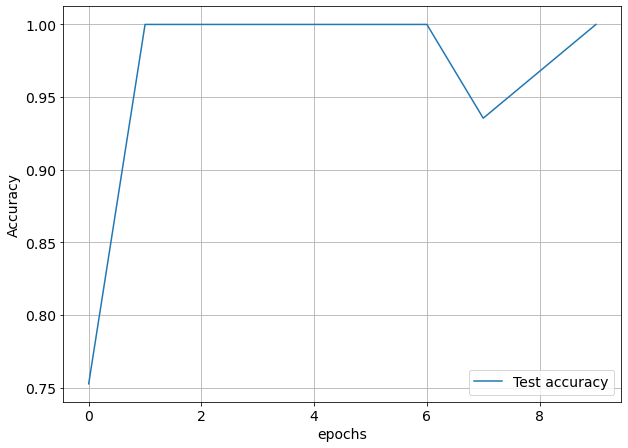

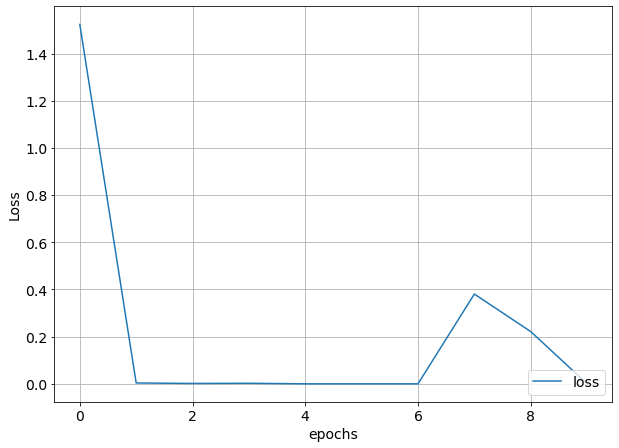

In [9]:
base_model=ResNet50(include_top=False, weights="imagenet")
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation="relu")(x)
predictions=Dense(test_generator.num_classes,activation="softmax")(x)
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False
    
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history=model.fit(test_generator,
         epochs=10)
accuracy = history.history['accuracy']
loss=history.history['loss']
# loss = history.history["categorical_crossentropy"]

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Test accuracy')
# plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('epochs')
# plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:
#           {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

In [ ]:

base_model=ResNet50(include_top=False, weights="imagenet")
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation="relu")(x)
predictions=Dense(test_generator.num_classes,activation="softmax")(x)
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False
    
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history=model.fit(test_generator,
         epochs=10)
accuracy = history.history['accuracy']
loss=history.history['loss']
# loss = history.history["categorical_crossentropy"]

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Train accuracy')
# plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('epochs')


In [16]:
model.save(r"D:\lab images\saved_model\ResNet50.h5")

In [17]:
test_loss,test_acc=model.evaluate(test_generator,verbose=2)

print("\nTest accuracy:",test_acc)  #accuracy of test dataset


93/93 - 14s - loss: 0.0018 - accuracy: 1.0000 - 14s/epoch - 155ms/step

Test accuracy: 1.0


1/1 [==============================] - 0s 163ms/step


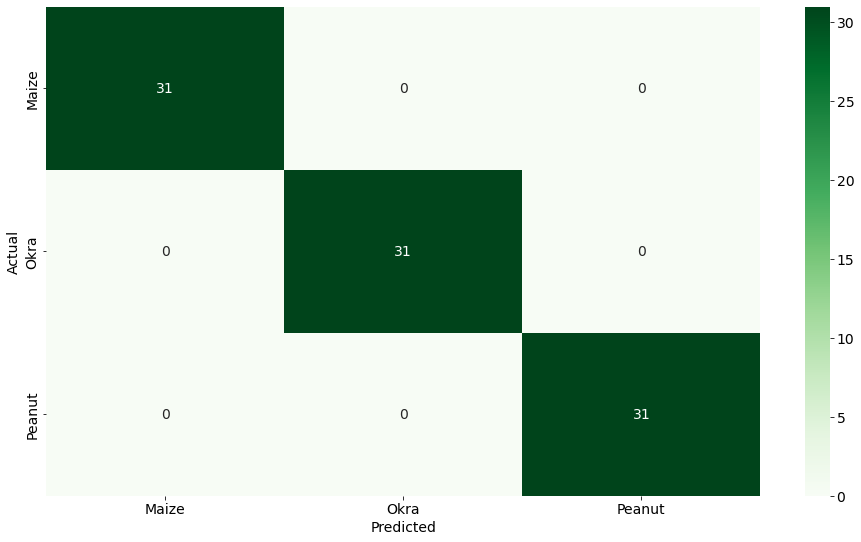

test accuracy:Predicted
Maize     300.0
Okra      300.0
Peanut    300.0
dtype: float64


In [18]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model=tf.keras.models.load_model(r"D:\lab images\saved_model\ResNet50.h5")
filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test=test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=["predicted_class","actual_class"])
confusion_matrix=pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actual"],colnames=["Predicted"])

sn.heatmap(confusion_matrix,cmap="Greens",annot=True,fmt="d")
plt.show()
print("test accuracy:{}".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))



In [21]:
confusion_matrix.to_csv(r'D:/ResNet50_Confusion_Matrix.csv')

from pandas import ExcelWriter
writer = ExcelWriter('SVM_Confusion_Matrix.xlsx')
confusion_matrix.to_excel(writer,'Sheet1')
writer.save()

In [19]:
print(predicted_class)

['Peanut', 'Maize', 'Okra', 'Okra', 'Okra', 'Maize', 'Maize', 'Okra', 'Maize', 'Okra', 'Maize', 'Maize', 'Maize', 'Maize', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Peanut', 'Okra', 'Maize', 'Okra', 'Maize', 'Okra', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Maize', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Maize', 'Maize', 'Peanut', 'Maize', 'Okra', 'Maize', 'Maize', 'Okra', 'Maize', 'Okra', 'Peanut', 'Okra', 'Maize', 'Maize', 'Maize', 'Okra', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Peanut', 'Peanut', 'Maize', 'Okra', 'Maize', 'Peanut', 'Okra', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Maize', 'Maize', 'Okra', 'Okra']


In [20]:
print(actual_class)

['Peanut', 'Maize', 'Okra', 'Okra', 'Okra', 'Maize', 'Maize', 'Okra', 'Maize', 'Okra', 'Maize', 'Maize', 'Maize', 'Maize', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Peanut', 'Okra', 'Maize', 'Okra', 'Maize', 'Okra', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Maize', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Maize', 'Maize', 'Peanut', 'Maize', 'Okra', 'Maize', 'Maize', 'Okra', 'Maize', 'Okra', 'Peanut', 'Okra', 'Maize', 'Maize', 'Maize', 'Okra', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Peanut', 'Peanut', 'Peanut', 'Maize', 'Okra', 'Maize', 'Peanut', 'Okra', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Maize', 'Maize', 'Okra', 'Okra']
